## Apply PCA and Clustering to Wholesale Customer Data

In this homework, we'll examine the [**_Wholesale Customers Dataset_**](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers), which we'll get from the UCI Machine Learning Datasets repository.  This dataset contains the purchase records from clients of a wholesale distributor.  It details the total annual purchases across categories seen in the data dictionary below:

**Category** | **Description** 
:-----:|:-----:
CHANNEL| 1= Hotel/Restaurant/Cafe, 2=Retailer (Nominal)
REGION| Geographic region of Portugal for each order (Nominal)
FRESH| Annual spending (m.u.) on fresh products (Continuous);
MILK| Annual spending (m.u.) on milk products (Continuous); 
GROCERY| Annual spending (m.u.)on grocery products (Continuous); 
FROZEN| Annual spending (m.u.)on frozen products (Continuous) 
DETERGENTS\_PAPER| Annual spending (m.u.) on detergents and paper products (Continuous) 
DELICATESSEN| Annual spending (m.u.)on and delicatessen products (Continuous); 

**_TASK:_** Read in `wholesale_customers_data.csv` from the `datasets` folder and store in a dataframe.  Store the `Channel` column in a separate variable, and then drop the `Channel` and `Region` columns from the dataframe. Scale the data and use PCA to engineer new features (Principal Components).  Print out the explained variance for each principal component. 

## K-Means, but Without All the Supervision
 

**_Challenge:_** Use K-Means clustering on the `wholesale_customers` dataset, and then again on a version of this dataset transformed by PCA.  

1. Read in the data from the `wholesale_customers_data.csv` file contained within the datasets folder.  

2. Store the `Channel` column in a separate variable, and then drop the `Region` and `Channel` columns from the dataframe.  `Channel` will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.  

3.  Scale the data, fit a k-means object to it, and then visualize the data and the clustering.  

4.  Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.  

**Challenge:_** Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were.  Which did better--scaled data, or data transformed by PCA?



In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("Wholesale Customers Data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
df.describe

<bound method NDFrame.describe of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  

In [17]:
channel = df['Channel'].to_numpy()
channel

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,

In [18]:
df = df.drop(['Channel', 'Region'], axis=1)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [19]:
from sklearn.preprocessing import StandardScaler


std_scalar = StandardScaler()
scaled_data = std_scalar.fit_transform(df)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x = pca.fit_transform(scaled_data)


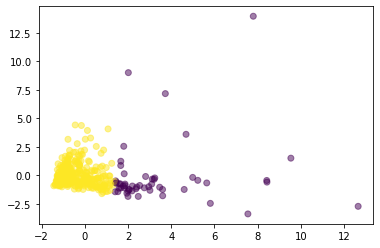

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=0)
k_fit = kmeans.fit(s_data)
y_kmeans = kmeans.predict(s_data)

plt.scatter(x[:,0],x[:, 1], c=kmeans.labels_, alpha=0.5, edgecolors='face')
